# **Develop a python code to implement Logistic Regression Model on MNIST dataset in order to classify numbers.**

## By: Jasleen Minhas

## UID: 20BCS6897 


In [1]:
# Importing libraries
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# **Load the MNIST dataset from sklearn and understanding it**

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache=False)
# https://www.openml.org/d/554

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
type(mnist.data), type(mnist.categories), type(mnist.feature_names), type(mnist.target)

(pandas.core.frame.DataFrame, NoneType, list, pandas.core.series.Series)

In [5]:
print("Image Data Shape" , mnist.data.shape)  # Print to show there are 70,000 images (28 by 28 images for a dimensionality of 784)

print("Label Data Shape", mnist.target.shape) # Print to show there are 70,000 labels (integers from 0–9)

Image Data Shape (70000, 784)
Label Data Shape (70000,)


* There are 70,000 images, each of dimension 28x28 pixels.

## **Split the dataset into training and test set**

The code below splits the data into training and test data sets. The test_size=1/7.0 makes the training set size 60,000 images and the test set size of 10,000.


In [6]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, 
                                                            mnist.target.astype('int'), 
                                                            test_size=1/7.0, 
                                                            random_state=0)

In [7]:
# X is the image
train_img.shape, test_img.shape

((60000, 784), (10000, 784))

In [8]:
# y is the label
train_lbl.shape, test_lbl.shape

((60000,), (10000,))

### Preview some images

In [9]:
train_img = np.array(train_img)
print(type(train_img))

<class 'numpy.ndarray'>


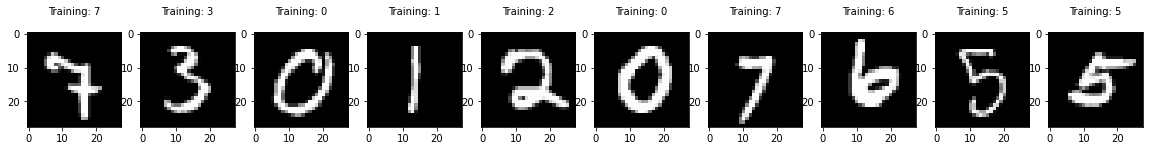

In [10]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:10], train_lbl[0:10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image.reshape(28,28), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 10)


# **Modelling - Applying Logistic Regression Model**

In [11]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [12]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression()

In [13]:
logisticRegr.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
logisticRegr.coef_.shape

(10, 784)

In [15]:
predictions = logisticRegr.predict(test_img)

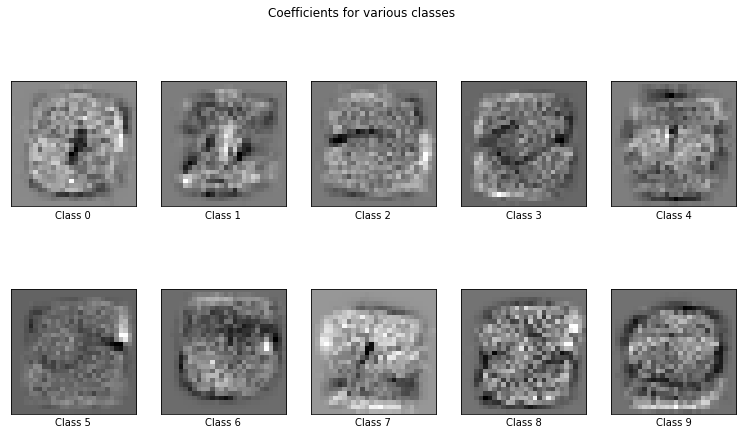

In [16]:
coef = logisticRegr.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(13,7))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(28,28), 
                     cmap=plt.cm.gray)
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');


# **Measure the Accuracy of the Logistic Regression Model**

In [17]:
print(logisticRegr.predict(test_img[0:9]))
print([test_lbl[0:9]])

[0 4 1 2 4 7 7 1 1]
[10840    0
56267    4
14849    1
62726    2
47180    7
61640    9
52730    7
21847    1
20394    1
Name: class, dtype: int64]


In [18]:
# training score
train_score = logisticRegr.score(train_img, train_lbl)
print(train_score)

0.9352833333333334


In [19]:
# testing score
# Use score method to get accuracy of model
test_score = logisticRegr.score(test_img, test_lbl)
print(test_score)

0.9184


### **Important points:**

* **Acurracy for training set: 95%**

* **Acurracy for testing set: 91%**

# Confusion Matrix

In [20]:
# Confusion Matrix is the table used in describing the 
# performance of a Classifier that we have trained using the dataset.

import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

[[ 968    0    1    1    2   10    8    2    4    0]
 [   0 1115    6    2    1    4    0    4    7    2]
 [   4   12  933   15   12    1   15    9   35    4]
 [   1    5   35  892    0   25    3   12   27   13]
 [   1    2    5    0  898    1   11   10    6   28]
 [   8    2    8   31    9  746   13    5   33    8]
 [   8    3    8    0   11   17  936    2    4    0]
 [   2    5   15    4   11    2    1  980    4   40]
 [   4   20   11   18    7   28    9    2  854   10]
 [   4    4    5   10   34    8    2   32    8  862]]


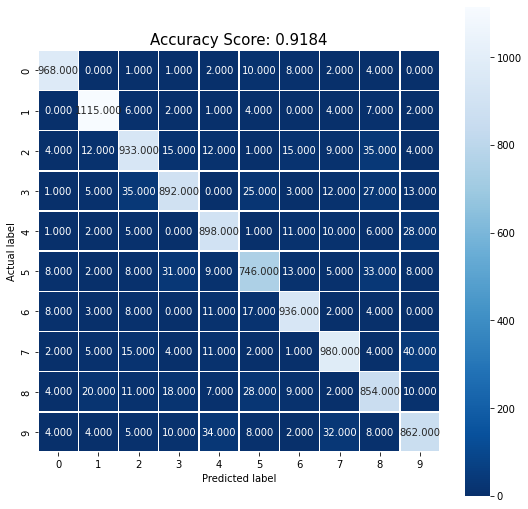

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(test_score)
plt.title(all_sample_title, size = 15)
plt.show()

# **Display predictions on some random images from test set**

In [23]:
# function to convert float image to uint8, and map values in range 0-255
def process(image):
    image -= image.min()
    image /= image.max()
    image *= 255
    return image.astype(np.uint8)

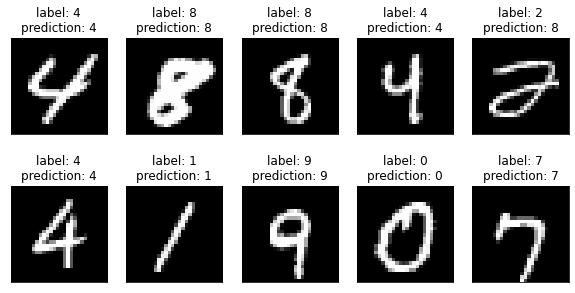

In [24]:
# display predictions on some random images from test set
plt.figure(figsize=(10,5))

R, C = 2, 5
N = R * C
indices = np.random.randint(0, len(test_img), size=N)
X_test = np.array(test_img)
y_test = np.array(test_lbl)

for i, idx in enumerate(indices):
    test_image = X_test[idx].reshape(1,-1)
    prediction = logisticRegr.predict(test_image)[0]
    ax = plt.subplot(R, C, i + 1)
    plot_image = process(test_image.reshape((28, 28)))
    ax.title.set_text(f'label: {y_test[idx]}\nprediction: {prediction}')
    ax.imshow(plot_image, cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.show()

# **Display predictions on 1's and 0's**

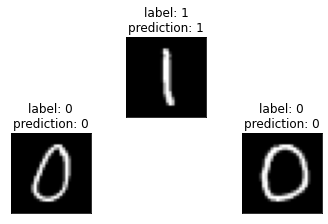

In [31]:
# display predictions on 1's and 0's
plt.figure(figsize=(10,5))

indices = np.random.randint(0, len(test_img), size=N)
X_test = np.array(test_img)
y_test = np.array(test_lbl)

for i, idx in enumerate(indices):
  if(y_test[idx]==0 or y_test[idx]==1):
    test_image = X_test[idx].reshape(1,-1)
    prediction = logisticRegr.predict(test_image)[0]
    ax = plt.subplot(3, 5, i + 1)
    plot_image = process(test_image.reshape((28, 28)))
    ax.title.set_text(f'label: {y_test[idx]}\nprediction: {prediction}')
    ax.imshow(plot_image, cmap='gray')
    plt.xticks([]), plt.yticks([])
  else:
    continue
plt.show()

# **Display Misclassified images with Predicted Labels (MNIST)**

In [26]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0

# Storing the misclassified images from the test set 
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
  if label != predict: 
    misclassifiedIndexes.append(index)
  index += 1


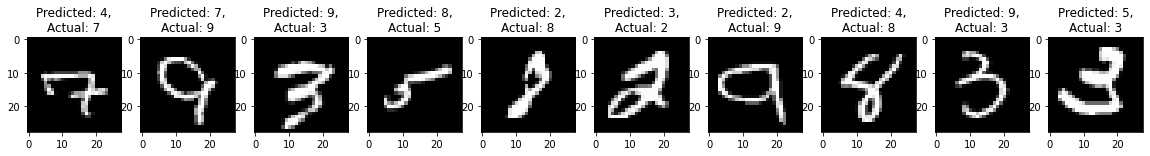

In [27]:
# Plotting misclassified images from testing set

plt.figure(figsize=(20,4))
test_img = np.array(test_img)
predictions = np.array(predictions)
test_lbl = np.array(test_lbl)
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:10]):
 plt.subplot(1, 10, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title(f'Predicted: {predictions[badIndex]},\nActual: {test_lbl[badIndex]}')

### **Performance report**

In [22]:
# log the performance report of the LR_classifier using test_lbl and predictions
print("Performance Report: \n %s \n" % (metrics.classification_report(test_lbl, predictions)))

Performance Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       996
           1       0.95      0.98      0.97      1141
           2       0.91      0.90      0.90      1040
           3       0.92      0.88      0.90      1013
           4       0.91      0.93      0.92       962
           5       0.89      0.86      0.88       863
           6       0.94      0.95      0.94       989
           7       0.93      0.92      0.92      1064
           8       0.87      0.89      0.88       963
           9       0.89      0.89      0.89       969

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000
 



# **Conclusion**

The above code is performing multi-class classification using logistic regression using one-vs-all technique. When run on MNIST DB, the best accuracy is still just **91%.** 